In [1]:
import networkx as nx
import pandas as pd

In [2]:
%time raw_df = pd.read_csv('data.csv')

CPU times: user 19.6 s, sys: 3 s, total: 22.6 s
Wall time: 19.8 s


In [14]:
import matplotlib.pyplot as plt
df = raw_df[['Source.IP', 'Destination.IP']]
df = df.head(500)

In [15]:
df.isna().sum()

Source.IP         0
Destination.IP    0
dtype: int64

In [16]:
df['Source.IP'].nunique()

60

In [17]:
df['Destination.IP'].nunique()

81

In [18]:
G = nx.from_pandas_edgelist(df, source='Source.IP', target='Destination.IP', edge_attr=True, 
                            create_using=nx.DiGraph())

In [19]:
G.number_of_edges()

125

In [20]:
G.number_of_nodes()

104

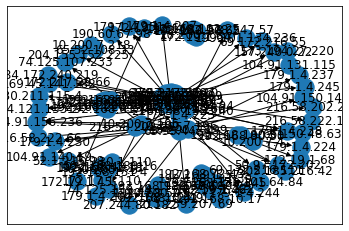

In [21]:
nx.draw_networkx(G)

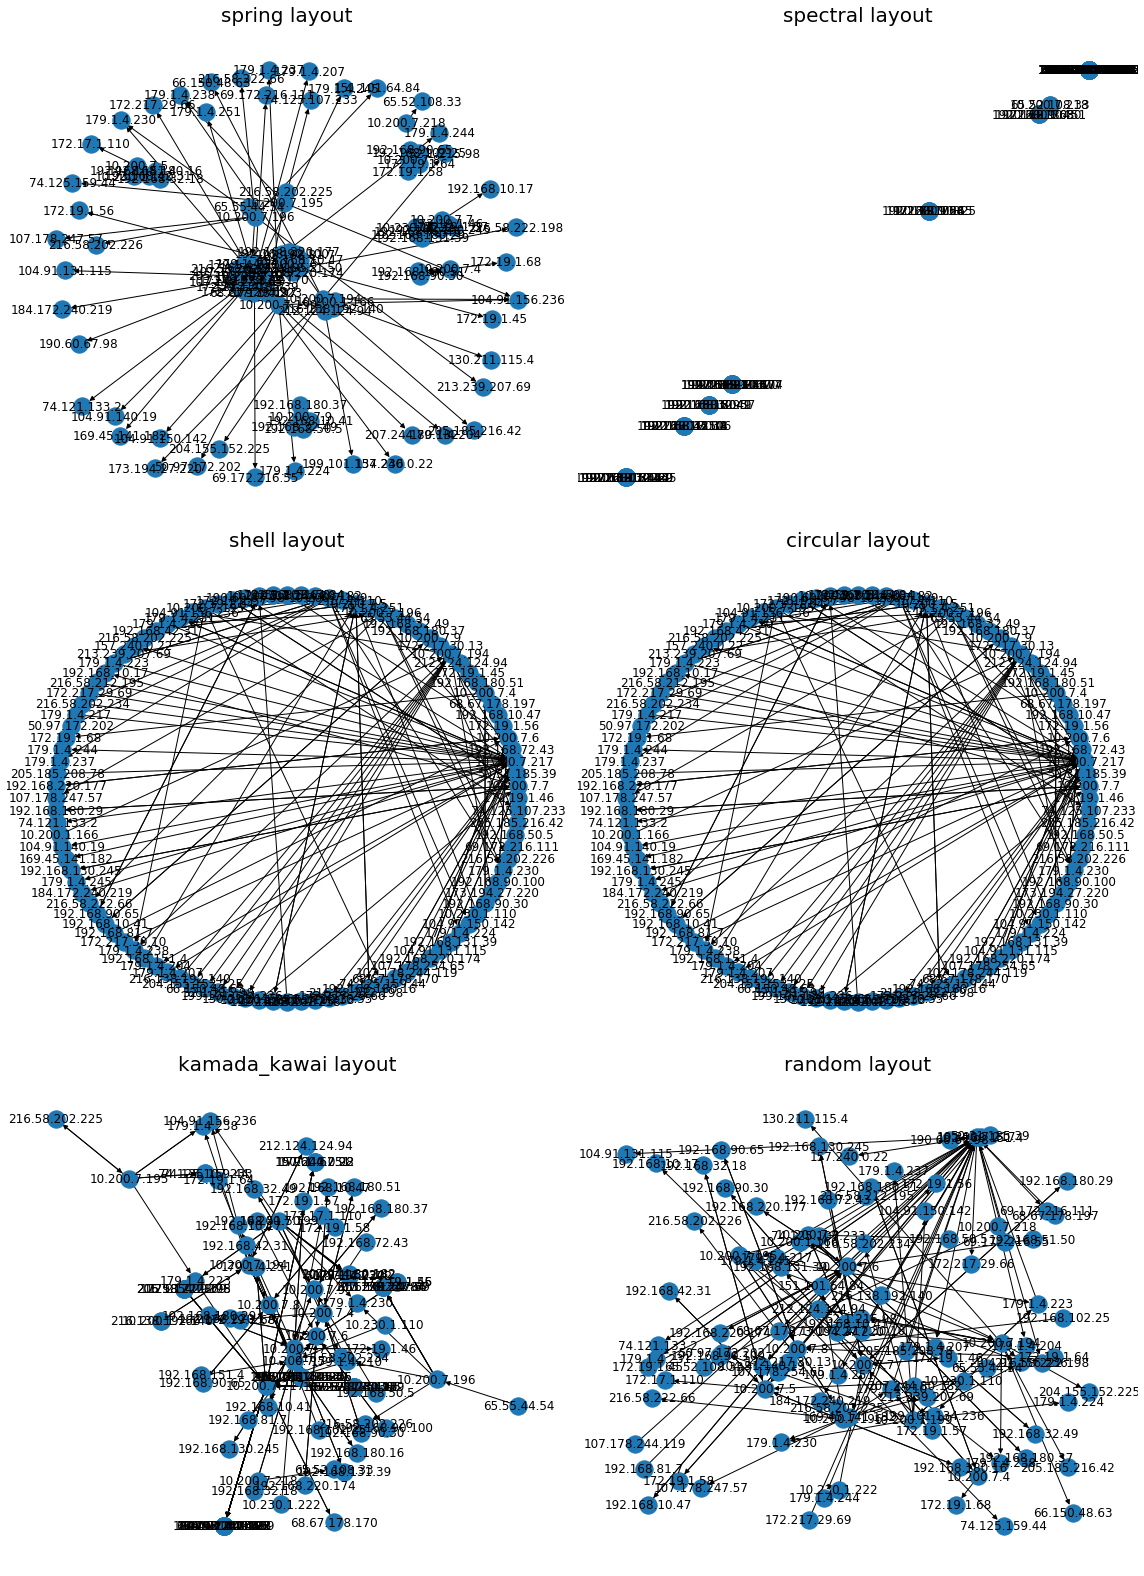

In [22]:
f, axes = plt.subplots(3, 2)
f.set_size_inches((16, 22)) 
## layout 설정 
layouts = {'spring': nx.spring_layout(G), 
           'spectral':nx.spectral_layout(G), 
           'shell':nx.shell_layout(G), 
           'circular':nx.circular_layout(G),
           'kamada_kawai':nx.kamada_kawai_layout(G), 
           'random':nx.random_layout(G)
          }
## 각 axis마다 그림을 따로 그려줌
for i, kv in enumerate(layouts.items()):
    title, pos, ax = kv[0], kv[1], axes[i//2][i%2]
    nx.draw_networkx(G, kv[1], ax=ax)
    ax.set_title("{} layout".format(title), fontsize=20)
    ax.axis('off')
plt.tight_layout()
plt.savefig('image.png')
plt.show()